DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


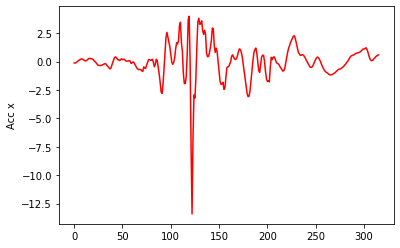

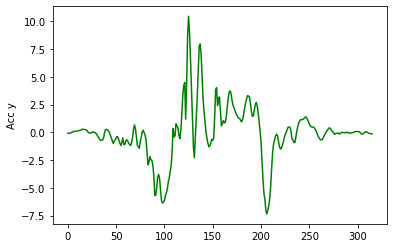

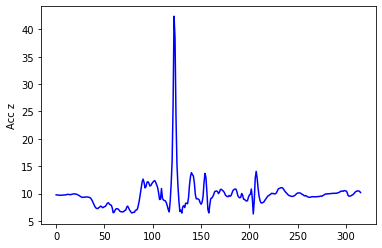

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

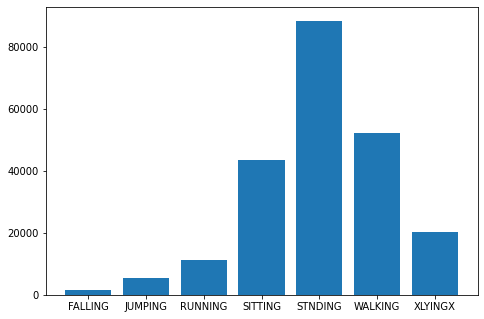

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [30]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [31]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
import data_transformation as dt

#X_data, y_data = dt.data_augmentation(X_data, y_data, [dt.jitter])

FALLING


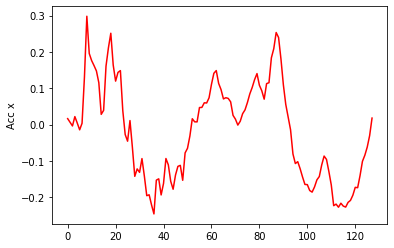

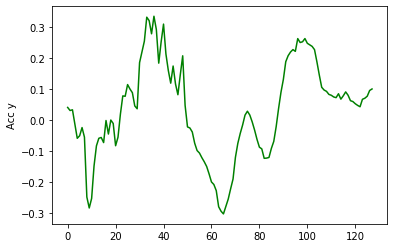

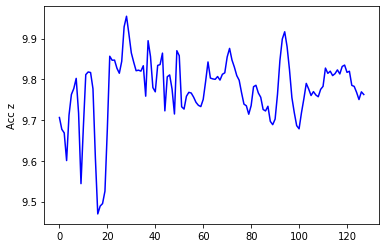

In [32]:
measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

#from sklearn.model_selection import StratifiedShuffleSplit
#X_train = []
#X_test = []
#y_train = []
#y_test = []
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
#for train_index, test_index in split.split(X_data, y_data):
#    X_train.append(X_data[train_index])
#    y_train.append(y_data[train_index])
#    X_test.append(X_data[test_index])
#    y_test.append(y_data[test_index])
#X_train = np.array(X_train[0])
#y_train = np.array(y_train[0])
#X_test = np.array(X_test[0])
#y_test = np.array(y_test[0])

In [34]:
#check https://stackoverflow.com/questions/59979763/cant-get-done-conv1d-with-tf-keras
#check https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(X_train.shape)
print(y_train.shape)

(160675, 128, 6)
(160675,)


In [15]:
#fig, axs = plt.subplots(3, 2)
#fig.set_figheight(15)
#fig.set_figwidth(15)
#axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
#axs[0, 0].set_title('Real Acc x')
#axs[0, 1].plot(X_prova[measure,:,0], 'tab:red')
#axs[0, 1].set_title('Pred Acc x')
#
#axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
#axs[1, 0].set_title('Real Acc y')
#axs[1, 1].plot(X_prova[measure,:,1], 'tab:green')
#axs[1, 1].set_title('Pred Acc y')
#
#axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
#axs[2, 0].set_title('Real Acc 1')
#axs[2, 1].plot(X_prova[measure,:,2], 'tab:blue')
#axs[2, 1].set_title('Pred Acc 1')

In [35]:
from data_transformation import data_normalizaion

X_train = data_normalizaion(X_train)
X_test = data_normalizaion(X_test)

/Users/denisderonjic/Repos/ActivityRecognition/data_transformation.py:72: RuntimeWarning: invalid value encountered in true_divide
  normed = (normed - normed.min()) / (normed.max() - normed.min())#(prova - np.min(prova)) / (np.max(prova) - np.min(prova))


In [17]:
batch_size = 56
dataset = tf.data.Dataset.from_tensor_slices((X_train[:10], y_train[:10])).shuffle(10000).batch(batch_size)

In [18]:
from models import Encoder, Decoder
encoded_space_dim = 64
encoder = Encoder(encoded_space_dim)
decoder = Decoder()

for (sig, label) in dataset:
  #sig = tf.transpose(sig, [0, 2, 1])
  
  print(sig.shape)
  x = encoder(sig)
  x = decoder(x)
  print(x.shape)
  break

(10, 128, 6)
(10, 128, 6)


In [19]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])
output = autoencoder(X_train[:1])
#compute_loss(autoencoder, X_train[:1])
print(output.shape)

(1, 128, 6)


In [20]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            (1, 64)                   150560    
_________________________________________________________________
decoder (Decoder)            (1, 128, 6)               150726    
Total params: 301,286
Trainable params: 301,286
Non-trainable params: 0
_________________________________________________________________


In [21]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            multiple                  0 (unused)
_________________________________________________________________
conv1d (Conv1D)              multiple                  4864      
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  98432     
_________________________________________________________________
conv1d_2 (Conv1D)            multiple                  24640     
_________________________________________________________________
conv1d_3 (Conv1D)            multiple                  6176      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1644

In [22]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  16640     
_________________________________________________________________
reshape (Reshape)            multiple                  0         
_________________________________________________________________
conv1d_transpose (Conv1DTran multiple                  6208      
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr multiple                  24704     
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr multiple                  98560     
_________________________________________________________________
conv1d_transpose_3 (Conv1DTr multiple                  4614      
Total params: 150,726
Trainable params: 150,726
Non-trainable params: 0
_____________________________________________________

In [23]:
loss_object = tf.keras.losses.BinaryCrossentropy()#tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam()

encoded_space_dim = 64
encoder = Encoder(encoded_space_dim)
decoder = Decoder()
autoencoder = tf.keras.models.Sequential([encoder, decoder])
autoencoder.compile(optimizer=optimizer, loss=loss_object)

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = autoencoder.fit(X_train, X_train,
                epochs=5,
                shuffle=True,
                batch_size=256,
                validation_split=0.2,
                callbacks=[callback])

2021-08-16 15:57:57.292038: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-16 15:57:57.292174: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5
487/487 [==============================] - 34s 70ms/step - loss: 0.6611 - val_loss: 0.6407
Epoch 2/5
374/487 [======================>.......] - ETA: 7s - loss: 0.6353

KeyboardInterrupt: 

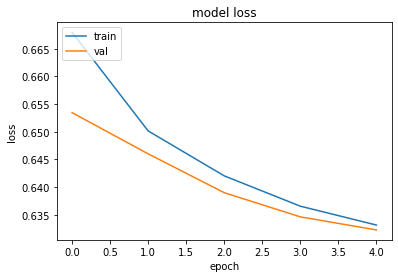

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_trans = autoencoder(X_test[:1000])


Text(0.5, 1.0, 'Pred Acc 1')

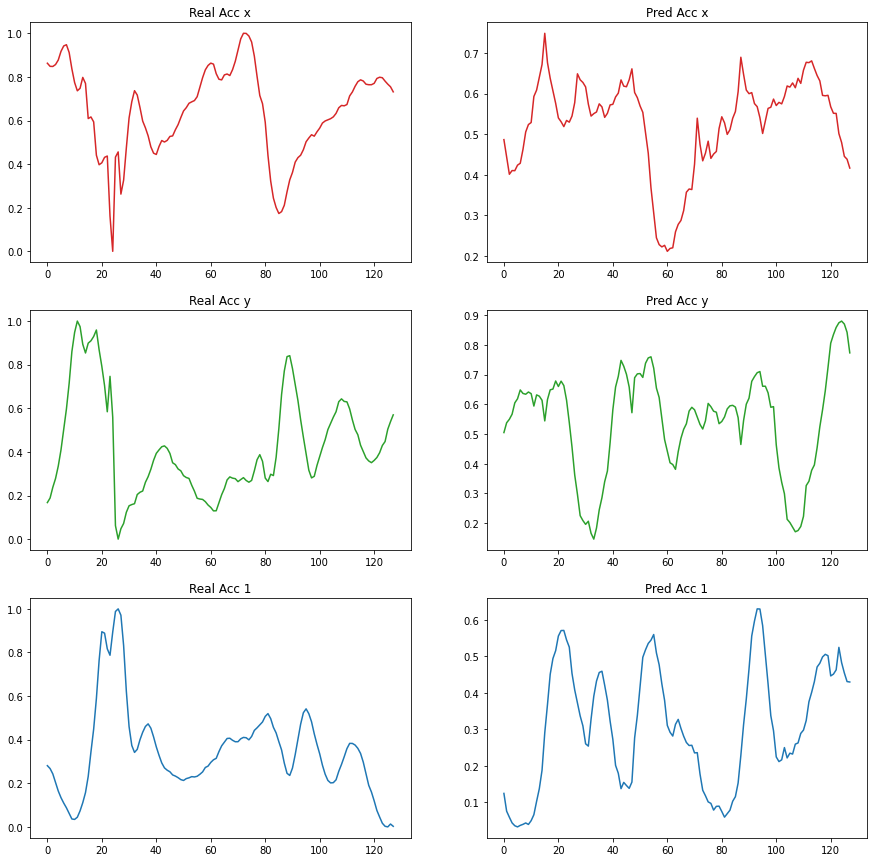

In [ ]:
measure = 94
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_trans[measure,:,0], 'tab:red')
axs[0, 1].set_title('Pred Acc x')

axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_trans[measure,:,1], 'tab:green')
axs[1, 1].set_title('Pred Acc y')

axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_trans[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Pred Acc 1')






In [ ]:
### Get the encoded representation of the test samples
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = encoder(sample)
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break

In [ ]:
print(np.array(encoded_samples).shape)

(10000, 64)


In [ ]:
from sklearn import manifold
tsne = manifold.TSNE(2, init='pca', random_state=0).fit_transform(encoded_samples)

In [ ]:
print(tsne)

[[ 28.25165     27.040283  ]
 [ -9.11407    -26.241278  ]
 [-11.230412   -10.442901  ]
 ...
 [-19.337095   -27.74584   ]
 [ 15.761287   -19.701319  ]
 [-63.8011      -0.38782406]]


In [ ]:
import plotly.express as px
px.scatter(x=tsne[:, 0], y=tsne[:, 1], color=labels, opacity=0.7)

RuntimeError: Attempting to capture an EagerTensor without building a function.

In [ ]:
from sklearn.svm import SVC

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_norm, y_train)).shuffle(10000).batch(1000)
encoded_train = []
labels = []
for sample, label in train_dataset:
    output = encoder(sample)
    
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_train.append(enc)
      labels.append(lbl)
encoded_train = np.array(encoded_train)
labels = np.array(labels)

In [ ]:
print(encoded_train.shape)

(152476, 128)


In [ ]:
svc = SVC(gamma='auto', verbose=True)

In [ ]:
#svc.fit(encoded_train, labels)

In [ ]:
for l in encoder.layers:
    l.trainable = False
linear =  tf.keras.models.Sequential([layer.Dense(32, activation='relu'), layer.Dense(num_labels, activation='softmax')])
model = tf.keras.models.Sequential([encoder, linear])
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_function, metrics=['acc'])

In [ ]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [ ]:
history = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=64,
                validation_split=0.2)

Epoch 1/10
1946/1946 [==============================] - 10s 5ms/step - loss: 1.3244 - acc: 0.5065 - val_loss: 1.1635 - val_acc: 0.5546
Epoch 2/10
1946/1946 [==============================] - 9s 5ms/step - loss: 1.0939 - acc: 0.5792 - val_loss: 1.0259 - val_acc: 0.5963
Epoch 3/10
1946/1946 [==============================] - 9s 5ms/step - loss: 0.9981 - acc: 0.6094 - val_loss: 0.9854 - val_acc: 0.6119
Epoch 4/10
1946/1946 [==============================] - 9s 5ms/step - loss: 0.9641 - acc: 0.6190 - val_loss: 0.9471 - val_acc: 0.6193
Epoch 5/10
1946/1946 [==============================] - 10s 5ms/step - loss: 0.9469 - acc: 0.6230 - val_loss: 0.9369 - val_acc: 0.6226
Epoch 6/10
1946/1946 [==============================] - 10s 5ms/step - loss: 0.9341 - acc: 0.6265 - val_loss: 0.9267 - val_acc: 0.6253
Epoch 7/10
1946/1946 [==============================] - 10s 5ms/step - loss: 0.9252 - acc: 0.6293 - val_loss: 0.9276 - val_acc: 0.6263
Epoch 8/10
1946/1946 [==============================] - 9s

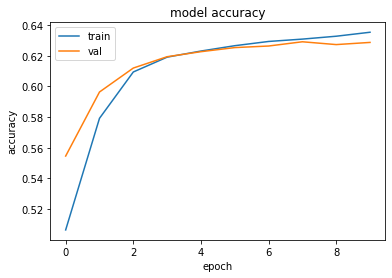

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(1000)
tot_acc = []
for (data, label) in test_dataset:

  y_pred = np.argmax(model(data), axis=1)
  matrix = confusion_matrix(label, y_pred)
  accuracy = np.trace(matrix) / np.sum(matrix)
  tot_acc.append(accuracy)
print(np.mean(tot_acc))

0.6319338273666631


In [ ]:
pred = np.argmax(model(X_test[:100]), axis=1)
print(le.inverse_transform(pred))

['STNDING' 'RUNNING' 'STNDING' 'STNDING' 'STNDING' 'RUNNING' 'STNDING'
 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'WALKING' 'JUMPING' 'RUNNING'
 'STNDING' 'STNDING' 'STNDING' 'WALKING' 'RUNNING' 'WALKING' 'STNDING'
 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING'
 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'WALKING'
 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'WALKING' 'STNDING'
 'STNDING' 'JUMPING' 'WALKING' 'RUNNING' 'WALKING' 'STNDING' 'STNDING'
 'STNDING' 'WALKING' 'RUNNING' 'STNDING' 'STNDING' 'STNDING' 'STNDING'
 'STNDING' 'STNDING' 'STNDING' 'WALKING' 'STNDING' 'STNDING' 'STNDING'
 'STNDING' 'STNDING' 'STNDING' 'RUNNING' 'WALKING' 'STNDING' 'STNDING'
 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING'
 'STNDING' 'WALKING' 'STNDING' 'STNDING' 'STNDING' 'STNDING' 'STNDING'
 'STNDING' 'WALKING' 'WALKING' 'WALKING' 'RUNNING' 'WALKING' 'STNDING'
 'STNDING' 'STNDING' 'STNDING' 'RUNNING' 'STNDING' 'RUNNING' 'WALKING'
 'STND

In [ ]:
print(le.inverse_transform(y_test[:100]))

['SITTING' 'STNDING' 'SITTING' 'SITTING' 'SITTING' 'SITTING' 'SITTING'
 'STNDING' 'WALKING' 'STNDING' 'WALKING' 'STNDING' 'SITTING' 'XLYINGX'
 'SITTING' 'WALKING' 'WALKING' 'SITTING' 'WALKING' 'WALKING' 'STNDING'
 'STNDING' 'WALKING' 'STNDING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'STNDING' 'SITTING' 'WALKING' 'STNDING' 'STNDING' 'RUNNING' 'RUNNING'
 'WALKING' 'STNDING' 'STNDING' 'SITTING' 'SITTING' 'WALKING' 'SITTING'
 'XLYINGX' 'STNDING' 'STNDING' 'WALKING' 'RUNNING' 'STNDING' 'STNDING'
 'STNDING' 'RUNNING' 'STNDING' 'WALKING' 'STNDING' 'STNDING' 'STNDING'
 'WALKING' 'STNDING' 'RUNNING' 'STNDING' 'STNDING' 'XLYINGX' 'STNDING'
 'XLYINGX' 'XLYINGX' 'STNDING' 'XLYINGX' 'STNDING' 'STNDING' 'XLYINGX'
 'XLYINGX' 'XLYINGX' 'SITTING' 'WALKING' 'STNDING' 'XLYINGX' 'WALKING'
 'XLYINGX' 'WALKING' 'WALKING' 'XLYINGX' 'STNDING' 'STNDING' 'SITTING'
 'SITTING' 'STNDING' 'RUNNING' 'WALKING' 'WALKING' 'STNDING' 'STNDING'
 'STNDING' 'RUNNING' 'WALKING' 'WALKING' 'RUNNING' 'SITTING' 'SITTING'
 'STND

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmppan6mdm7/assets


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_norm, y_test)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = encoder(sample)
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break

In [ ]:
from sklearn import manifold
tsne = manifold.TSNE(2, init='pca', random_state=0).fit_transform(encoded_samples)

In [ ]:
import plotly.express as px
px.scatter(x=tsne[:, 0], y=tsne[:, 1], color=labels, opacity=0.7)